## Analysis of PUBG mobile game

Scope :- To analyse pubg dataset and produce suggetions to improve game play 

What is PUBG mobile?

PlayerUnknown's Battlegrounds Mobile game is published by Tencent Games and is available for Android and iOS (i.e., iPhone). 

The game started phased roll-out from 19 March 2018 and went on to become one of the most downloaded and played games on both Android and iOS.

In [101]:
#importing the nessasary libraries 

import os
import pandas as pd
import statistics as st 
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#importing the first data set- PUBG wepons 

working_dictionery = os.getcwd()
path = working_dictionery + '/My Python Stuff/pubg-weapon-stats.csv'
pg = pd.read_csv(path)

In [9]:
pg.head() # this will show the first 5 rows of this dataset

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,0.080,4,2,612.0,"Single, Automatic, Burst"
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,0.010,4,2,490.0,"Single, Automatic"
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,0.086,4,2,547.0,"Single, Automatic, Burst"
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,0.010,4,2,490.0,"Single, Burst"
4,AUG A3,Assault Rifle,5.56,43,30,600.0,880.0,0.086,4,2,502.0,"Single, Automatic"


In [10]:
pg.shape # lets look at the shape of the dataset

# We have a small data set with 44 rows and 12 Columns

(44, 12)

In [5]:
pg.info # lets look at the information of the datatset

<bound method DataFrame.info of     Weapon Name              Weapon Type  Bullet Type  Damage  \
0         Groza            Assault Rifle         7.62      49   
1           AKM            Assault Rifle         7.62      49   
2          M762            Assault Rifle         7.62      47   
3   MK47 Mutant            Assault Rifle         7.62      49   
4        AUG A3            Assault Rifle         5.56      43   
5        SCAR-L            Assault Rifle         5.56      43   
6          M416            Assault Rifle         5.56      43   
7         M16A4            Assault Rifle         5.56      43   
8          G36C            Assault Rifle         5.56      43   
9           OBZ            Assault Rifle         5.56      43   
10         M249        Light Machine Gun         5.56      45   
11        DP-28        Light Machine Gun         7.62      51   
12       Vector           Submachine Gun         9.00      31   
13          Uzi           Submachine Gun         9.00     

In [7]:
pg_null = pg.isnull().sum() # This is to find out the columns with null entities.
pg_null[pg_null > 0]

Bullet Type     6
Range           6
Bullet Speed    8
BDMG_0          7
BDMG_1          7
BDMG_2          7
BDMG_3          7
HDMG_0          7
HDMG_1          7
HDMG_2          7
HDMG_3          7
dtype: int64

In [8]:
pg=  pg.drop(columns =['BDMG_0','BDMG_1','BDMG_2','BDMG_3','HDMG_0','HDMG_1','HDMG_2','HDMG_3'])

# BDMG and HDMG are body hit intencity which we will not need for this analysis so lets drop them. 

In [18]:
pg.head()

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,0.080,4,2,612.0,"Single, Automatic, Burst"
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,0.010,4,2,490.0,"Single, Automatic"
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,0.086,4,2,547.0,"Single, Automatic, Burst"
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,0.010,4,2,490.0,"Single, Burst"
4,AUG A3,Assault Rifle,5.56,43,30,600.0,880.0,0.086,4,2,502.0,"Single, Automatic"


In [20]:
pg[pg['Range'].isnull()]

# lets explore the null values in the Range column.

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode
38,Crossbow,Other,NaN,106,1,NaN,NaN,3.80,2,1,28.0,Single
39,Pan,Melee,NaN,80,1,NaN,NaN,0.75,3,1,107.0,Single
40,Crowbar,Melee,NaN,60,1,NaN,NaN,0.75,3,2,80.0,Single
41,Sickle,Melee,NaN,60,1,NaN,NaN,0.75,3,2,80.0,Single
42,Machete,Melee,NaN,60,1,NaN,NaN,0.75,3,2,80.0,Single
43,Punch,Melee,NaN,18,1,NaN,NaN,0.33,10,4,55.0,Single


These 6 rows have null values because these are Wepons which does not need bullets as a result they will have null values in Bullet type, Range and Bullet speed Columns. 

In [23]:
pg['Bullet Type']=pg['Bullet Type'].replace(np.NaN,1)
# lets change the none value of Bullet type with 1 for futher analysis

In [27]:
pg.isnull().sum()

# Perfect we do not have none value for Bullet type anymore

Weapon Name              0
Weapon Type              0
Bullet Type              0
Damage                   0
Magazine Capacity        0
Range                    6
Bullet Speed             8
Rate of Fire             0
Shots to Kill (Chest)    0
Shots to Kill (Head)     0
Damage Per Second        0
Fire Mode                0
dtype: int64

In [35]:
sns.set(color_codes = True) # This is to make the representation more colorful

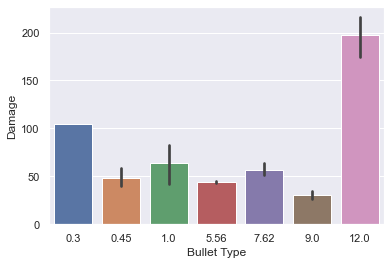

In [60]:
sns.barplot(x = pg['Bullet Type'],y = pg['Damage'])

plt.show() 

# lets compare the correlation between Bullet Types and damage

This is really intresting, as a PUBG mobile player, I had always thought that the bigger the Bullet Size the more damage it creates, But it is really intresting as that is not true.

from the analysis we can conclude that 12mm bullet creates the most damage and 9.0mm bullet creates the least amount of damage.

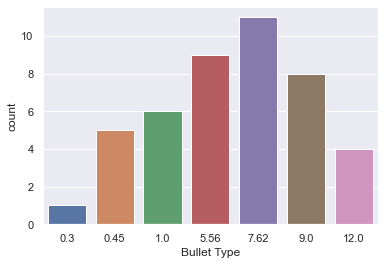

In [59]:
sns.countplot(x = pg['Bullet Type'])

plt.show() 

# to see how hard is to find diffrent types of bullets in the game

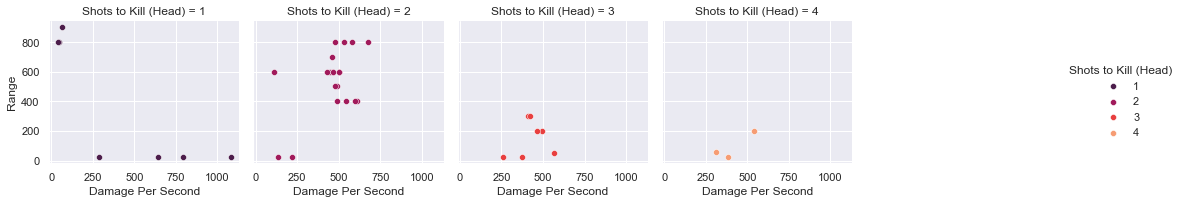

In [95]:
sns.set(font_scale=1)
pubg1 = sns.FacetGrid(data=pg,
                         col = 'Shots to Kill (Head)',
                         hue = 'Shots to Kill (Head)',
                         palette='rocket',
                         col_wrap=5,)
pubg1.map(sns.scatterplot, 'Damage Per Second' , 'Range') 

pubg1.add_legend()

plt.show() 

From this analysis we can come to the conclusion that as the range increases the damage decreases. 
range is inversly propostional to the Damage per second.

In [69]:
pg.nlargest(n=5,columns = 'Range') # lets checkout the weapon with the largest range

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode
27,AWM,Sniper Rifle,0.30,105,5,900.0,910.0,1.85,2,1,65.0,Single
21,MK14,Designed Marksman Rifle,7.62,61,10,800.0,853.0,0.09,3,2,678.0,"Single, Automatic"
22,SLR,Designed Marksman Rifle,7.62,56,10,800.0,835.0,0.01,3,2,580.0,Automatic
23,SKS,Designed Marksman Rifle,7.62,53,10,800.0,800.0,0.01,3,2,530.0,Automatic
24,QBU,Designed Marksman Rifle,5.56,48,10,800.0,800.0,0.01,3,2,480.0,Automatic


In [70]:
pg.nsmallest(n=5,columns = 'Range')

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode
18,S686,Shotgun,12.00,216,2,25.0,370.0,0.20,1,1,1080.00,Automatic
19,S1897,Shotgun,12.00,216,5,25.0,360.0,0.70,1,1,288.00,Automatic
20,S12K,Shotgun,12.00,198,5,25.0,350.0,0.25,1,1,792.00,Automatic
31,Sawed-Off,Pistol,12.00,160,2,25.0,NaN,0.25,2,1,640.00,Automatic
32,R1895,Pistol,7.62,55,7,25.0,330.0,0.40,4,2,137.51,Automatic


From the analysis we found out that, AWM ( sniper riffle) has the longest range and the smallest damage per second as range is inversly propotional to the damage per second. S686 (Shotgun) has the lowest range but the highest damage per second.



In [74]:
%matplotlib inline
sns.set() # for further visualisation

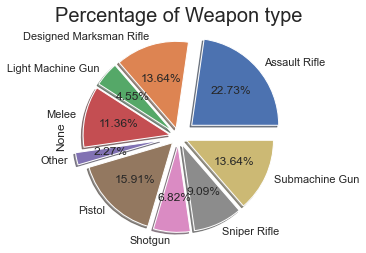

In [123]:
pg.groupby('Weapon Type').size().plot (kind='pie', autopct = '%.2f%%',explode =(0.2,0.1,0.1,0.1,0.2,0.1,0.1,0.1,0.1),
                                      shadow= True)
fontsize=20
plt.title('Percentage of Weapon type',fontdict={'fontsize':fontsize})

plt.show()  # Visualising percentage of Weapon type through a pie chart

From this representation we can understand that the maximum amount of wepon type in PUBG mobile is 'Assault Rifle',
The minimum amount of wepons in the game is 'others' which can be 'pan','Sicle' etc.

## Final Conclusion

With all the analysis and visualisation we did, the final conclusion to improve PUBG mobile game play are :-

. The most uncommon bullet size to get in PUBG mobile is 0.3 and as it is used for AWM snipper which has the longest range, it is best advised to collect the 0.3 bullets when found.

. As a player in PUBG mobile can carry upto 2 guns at a time. The best weapon combo will be AWM snipper for long range and S686 Shotgun for short hand combact.
  BONUS:- remember to gather bullet types .3 and 12 as they are not the easiest to find
  
. When the game starts it might be difficult to find the above mentioned weapon combo as a result, it when a game starts it is best to look for Assault Riffle as it is the most common weapon type and has the most common bullet type that is 7.62.

. Above all have fun!!


